### [Part1] 모집단과 표본집단의 분산 표준편차 계산
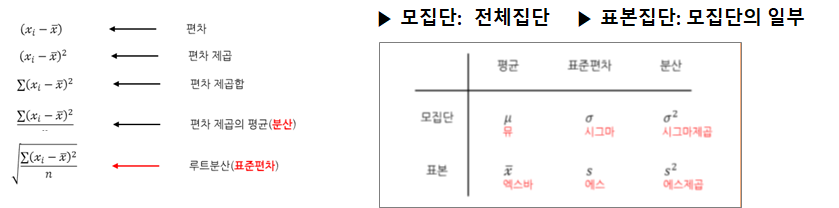

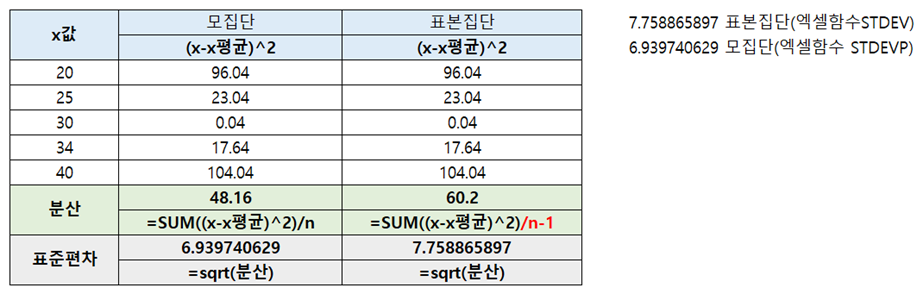

https://numpy.org/doc/stable/reference/generated/numpy.std.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

In [22]:
import numpy as np
x=[20,25,30,34,40]

print('---넘파이 모집단 분산/편차-----')
print(np.var(x,ddof=0))  # 모집단 분산, 기본 ddof=0임, ddof=1로 하면 표본집단
print(np.std(x))  # 모집단 표준편차



---넘파이 모집단 분산/편차-----
48.160000000000004
6.939740629158989


In [23]:

import pandas as pd

df=pd.DataFrame({"x":x})    

print('---판다스 표본집단 분산/편차-----')
# 기본 ddof=1임, ddof=0으로 하면 모집단
print(df.var(ddof=1)) # 판다스 표본집단 분산, 
print(df.std())  # 판다스 표본집단 표준편차


print('\n---판다스 모집단 표준편차-----')
print(df.values.std())  # 넘파이 모집단 표준편차

---판다스 표본집단 분산/편차-----
x    60.2
dtype: float64
x    7.758866
dtype: float64

---판다스 모집단 표준편차-----
6.939740629158989


## [Part2] 상관계수 R 값 계산
 상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)
 
https://sikaleo.tistory.com/42
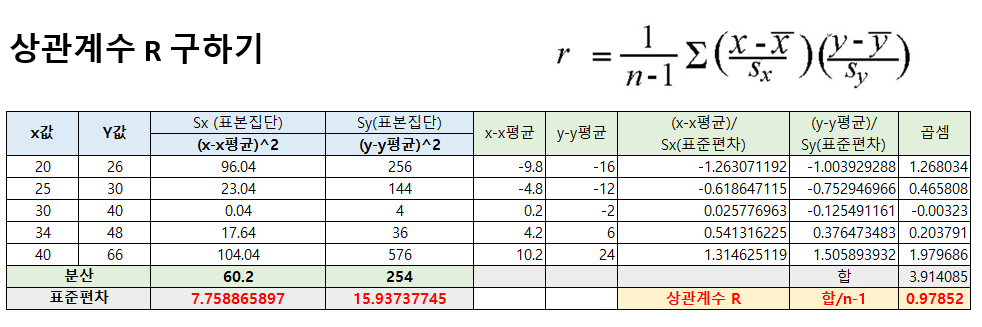

In [208]:
import numpy as np
x=[20,25,30,34,40]
y=[26,30,40,48,66]
df=pd.DataFrame({'x':x,'y':y})

print(df)
df.corr()
print(df.corr(method='pearson'))   # method 생략하면 기본 pearson

df['x'].corr(df['y'])

    x   y
0  20  26
1  25  30
2  30  40
3  34  48
4  40  66
          x         y
x  1.000000  0.978521
y  0.978521  1.000000


0.9785212611534365

In [71]:
#  식으로 작성하여 봅니다.





,x,y,계산x,계산y,곱셈
0,20,26,-1.263071,-1.003929,1.268034
1,25,30,-0.618647,-0.752947,0.465808
2,30,40,0.025777,-0.125491,-0.003235
3,34,48,0.541316,0.376473,0.203791
4,40,66,1.314625,1.505894,1.979686


상관계수 R은 0.98입니다.


## [Part3] 기울기를 구합니다.
방법1) 상관계수를 구하고 기울기를 구한다.
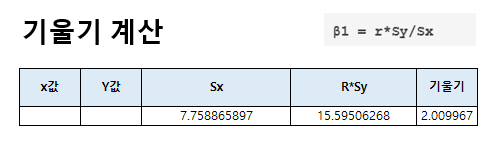


방법2) 기울기를 구하고 상관계수를 구한다.
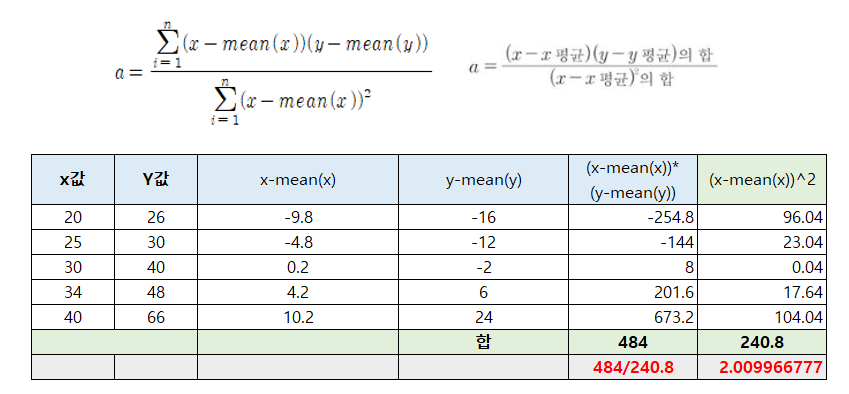

In [72]:
# 기울기 구하기 
# w=r*Sy/Sx




2.009966777408638

## [Part4] 절편값을 구합니다.
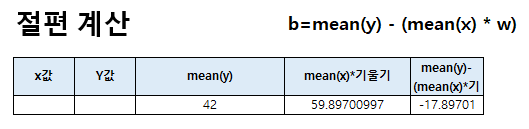

In [73]:
#  절편값 구하기


-17.89700996677741

## [Part5] 선형회귀 공식을 작성하여 차트를 작성하여 봅니다.
###  lr=wx+b

In [74]:
# 선형회귀 공식 적용


,x,y,계산x,계산y,곱셈,lr
0,20,26,-1.263071,-1.003929,1.268034,22.302326
1,25,30,-0.618647,-0.752947,0.465808,32.352159
2,30,40,0.025777,-0.125491,-0.003235,42.401993
3,34,48,0.541316,0.376473,0.203791,50.441860
4,40,66,1.314625,1.505894,1.979686,62.501661


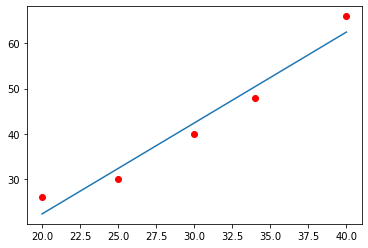

In [75]:
import matplotlib.pyplot as plt
plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],df['lr'])  # wx+b


In [78]:
def prediction(newX):
    print(w*newX+b)

In [80]:
prediction(20)

22.302325581395344


## [Part6] 사이킷런의 선형회귀식 적용

In [112]:
!pip install sklearn  # pip 인스톨  conda install scikit-learn?

In [84]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
model=LinearRegression()

[[22.30232558]]


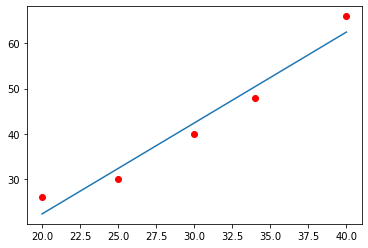

[[2.00996678]]
[-17.89700997]


8.635215946843855

## [Part7] 모델 성능평가요소
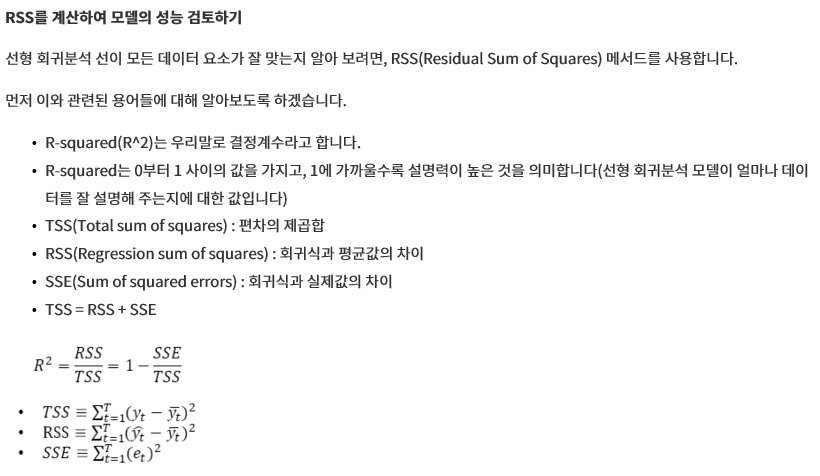
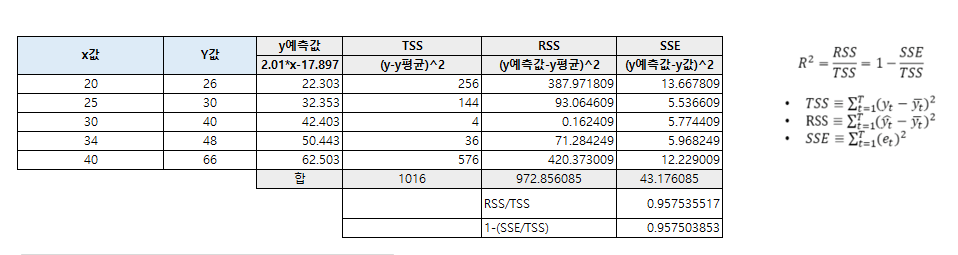

In [157]:

SSE=np.sum((y-model.predict(x))**2)
print('SSE:%.2f' % SSE)   # rss값은 sse값임. 
TSS=np.sum((y-np.mean(y))**2)
print('TSS:%.2f' % TSS)

print('R2= 1-SSE/TSS: %.2f'% (1-SSE/TSS ))


SSE:43.18
TSS:1016.00
R2= 1-SSE/TSS: 0.96


In [152]:
from sklearn.metrics import r2_score
y_hat=x*model.coef_+model.intercept_
print(y_hat)
r2_score(y,y_hat)  # 사이킷런 제공 R2값


[[22.30232558]
 [32.35215947]
 [42.40199336]
 [50.44186047]
 [62.50166113]]


0.9575038585293117

# [Part8] OLS 선형회귀

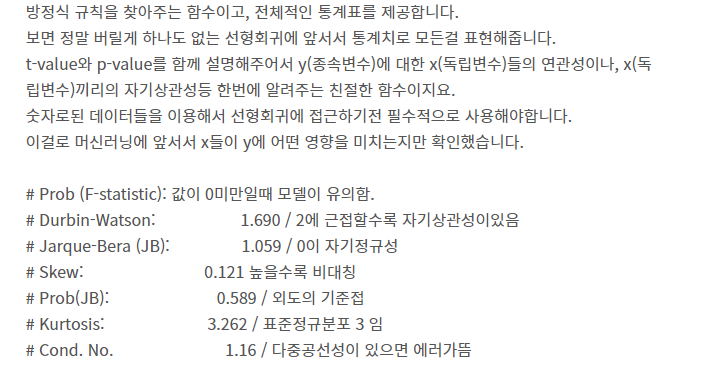

In [160]:
!pip install statsmodels

In [170]:
# https://datacook.tistory.com/39

import statsmodels.api as sm
lr = sm.OLS(y,x)
result= lr.fit() 
print(result.summary())
result.params


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              309.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):                    6.14e-05
Time:                        16:56:45   Log-Likelihood:                         -15.153
No. Observations:                   5   AIC:                                      32.31
Df Residuals:                       4   BIC:                                      31.92
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\user4\.conda\envs\hmh\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


array([1.44029054])

# [Part9] 모델 저장 및 재 활용

In [172]:
# https://cyan91.tistory.com/39

import pickle

In [175]:
filename='StartLr.sav'
pickle.dump(model,open(filename,'wb'))

In [187]:
# 회귀식 로드
import pickle
x=[[20],[25],[30],[34],[40]]
y=[[26],[30],[40],[48],[66]]

#

load_model=pickle.load(open('StartLr.sav','rb'))
print(load_model.score(x,y))

print(load_model.predict([[20]]))

0.9575038585293117
[[22.30232558]]
